# $2D\pm J$ Lattice SLRG Analysis Jupyter Notebook

In [1]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *
# plt.style.use("notebooks/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [7]:
lattice = Lattice2D(#
    side1 = 10,
    geometry = 'squared',
    lsp_mode = 'intervals'
)
lattice.lsp_selection(lattice.default_dict_lsp(num_at=7))

In [8]:
lattice.lsp

array([0.001, 0.03 , 0.06 , 0.096, 0.098, 0.1  , 0.102, 0.104, 0.106,
       0.108, 0.1  , 0.4  , 0.7  ])

## Squared 2D Lattice

In [3]:
#
STEPS = 1500
SPIKE_THRESHOLD = 0.1
TAUSTOPEXT = 5
GEOMETRY = 'squared'
#
pow2_m, pow2_M, pow2_A = 6, 14, 16
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(pow2_A-i) for i in asize_range])
lsp = np.round([0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 0.098, 0.100, 
                0.102, 0.104, 0.106, 0.11, 0.2, 0.3, 0.4, 0.5], 3)
#pesca tutti i p che trovi!

### Plot per system size $L$ and flip probability $p_{\rm flip}$

In [6]:
peakPosition = {iN: [] for iN in lsN}
for iL, iN, iA in zip(lsL, lsN, lsA):
    #
    path = f"{datPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
    lattice = Lattice2D(#
        side1 = iL,
        geometry = GEOMETRY,
        t2 = 5
    )
    fig_2, ax_2 = plt.subplots(figsize=(16,10))
    Cspe_plot_ax(ax_2)
    #
    for pflip in lsp:
        savename = lambda idstr : f"{path}p={pflip:{pflip_fmt}}_{idstr}{eBIN}"
        if not os.path.exists(savename('Sm1')):
            continue
        plpath = f"{pltPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
        if not os.path.isdir(plpath):
            os.makedirs(plpath)
        #
        t = np.logspace(-2, TAUSTOPEXT, STEPS)
        Sm1FromFile = np.fromfile(savename('Sm1')).reshape(iA, STEPS)
        CspecFromFile = np.log(iN) * np.diff(Sm1FromFile, axis=1)/np.diff(np.log(t))
        CspecAvg = CspecFromFile.mean(axis=0)
        #
        fig, ax = plt.subplots(figsize=(16,10))
        #
        Cspe_plot_ax(ax)
        #
        ax.plot(t[:-1], CspecFromFile.T)
        ax.plot(t[:-1], CspecAvg, 'k--', lw=2)
        ccp = ax_2.plot(t[:-1], CspecAvg, c='k' if pflip < lattice.p_c else 'r')
        #
        arr_max = argrelextrema(CspecAvg, np.greater)[0]
        for idx in arr_max[CspecAvg[arr_max] > 0.5]:
            ax.axvline(t[idx], c='r', lw=1)
        ax_2.axvline(t[arr_max[0]], c=ccp[0].get_color(), lw=1)
        peakPosition[iN].append([pflip, t[np.min(arr_max)]])
        #
        fig.savefig(f"{plpath}p={pflip:{pflip_fmt}}_<C>.pdf", bbox_inches='tight')
        fig.clear()
        plt.close(fig)
    fig_2.savefig(f"{plpath}<C>.pdf", bbox_inches='tight')
    fig_2.clear()
    plt.close(fig_2)

____

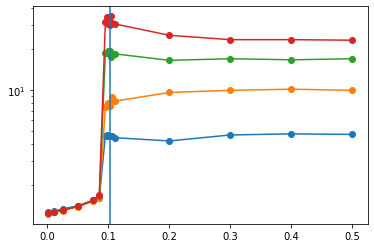

In [5]:
for key in peakPosition:
    peakPosition[key] = np.array(peakPosition[key])
for key in peakPosition:
    plt.plot(peakPosition[key][:,0], peakPosition[key][:,1], 'o-')
plt.axvline(0.103)
plt.yscale('log')

## Triangular 2D Lattice

In [10]:
#
STEPS = 1500
SPIKE_THRESHOLD = 0.1
TAUSTOPEXT = 4
GEOMETRY = 'triangular'
#
pow2_m, pow2_M, pow2_A = 6, 14, 16
ssize_range = range(pow2_m, pow2_M, 2)
asize_range = range(pow2_m, pow2_M, 1)[:len(ssize_range)]
#
lsN = np.array([2**i for i in ssize_range])
lsL = np.sqrt(lsN).astype('int')
lsA = np.array([2**(pow2_A-i) for i in asize_range])
lsp = np.round([0.001, 0.01, 0.025, 0.05, 0.075, 0.085, 0.095, 0.098, 0.100, 
                0.102, 0.104, 0.106, 0.11, 0.2, 0.3, 0.4, 0.5], 3)

### Plot per system size $L$ and flip probability $p_{\rm flip}$

In [11]:
peakPosition = {iN: [] for iN in lsN}
for iL, iN, iA in zip(lsL, lsN, lsA):
    #
    path = f"{datPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
    lattice = Lattice2D(#
        side1 = iL,
        geometry = GEOMETRY
    )
    fig_2, ax_2 = plt.subplots(figsize=(16,10))
    Cspe_plot_ax(ax_2)
    #
    for pflip in lsp:
        savename = lambda idstr : f"{path}p={pflip:{pflip_fmt}}_{idstr}{eBIN}"
        if not os.path.exists(savename('Sm1')):
            continue
        plpath = f"{pltPath_l2d(GEOMETRY)}N={iN}_navg={iA}/"
        if not os.path.isdir(plpath):
            os.makedirs(plpath)
        #
        t = np.logspace(-2, TAUSTOPEXT, STEPS)
        Sm1FromFile = np.fromfile(savename('Sm1')).reshape(iA, STEPS)
        CspecFromFile = np.log(iN) * np.diff(Sm1FromFile, axis=1)/np.diff(np.log(t))
        CspecAvg = CspecFromFile.mean(axis=0)
        #
        fig, ax = plt.subplots(figsize=(16,10))
        Cspe_plot_ax(ax)
        #
        ax.plot(t[:-1], CspecFromFile.T)
        ax.plot(t[:-1], CspecAvg, 'k--', lw=2)
        ccp = ax_2.plot(t[:-1], CspecAvg, c='k' if pflip < lattice.p_c else 'r')
        #
        arr_max = argrelextrema(CspecAvg, np.greater)[0]
        for idx in arr_max[CspecAvg[arr_max] > 0.5]:
            ax.axvline(t[idx], c='r', lw=1)
            ax_2.axvline(t[idx], c='k' if pflip < lattice.p_c else 'r', lw=1)
        peakPosition[iN].append([pflip, t[np.min(arr_max)]])
        #
        fig.savefig(f"{plpath}p={pflip:{pflip_fmt}}_<C>.pdf", bbox_inches='tight')
        fig.clear()
        plt.close(fig)
    fig_2.savefig(f"{plpath}<C>.pdf", bbox_inches='tight')
    fig_2.clear()
    plt.close(fig_2)

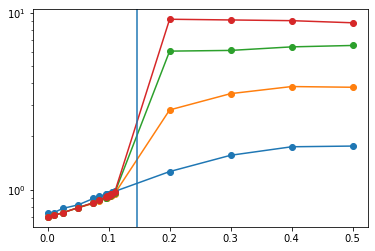

In [8]:
for key in peakPosition:
    peakPosition[key] = np.array(peakPosition[key])
for key in peakPosition:
    plt.plot(peakPosition[key][:,0], peakPosition[key][:,1], 'o-')
plt.axvline(0.146)
plt.yscale('log')

___

In [9]:
bb = np.fromfile("data/l2d_sq/N=64_navg=1024/p=0.001_Sm1.bin").reshape(1024, 1500)
for i in bb:
    plt.plot(np.logspace(-2, 4, 1500),bb)
    plt.plot(np.logspace(-2, 4, 1499),np.log(64) * np.diff(i)/np.diff(np.log(np.logspace(-2, 4, 1500))))
plt.plot(np.logspace(-2, 4, 1500),np.mean(bb, axis=0), 'k', lw=2)
plt.xscale('log')

FileNotFoundError: [Errno 2] No such file or directory: 'data/l2d_sq/N=64_navg=1024/p=0.001_Sm1.bin'

In [ ]:
bb = np.fromfile("../data/l2d_squared/N=64_navg=1024/p=0.5_Sm1.bin").reshape(1024, 1500)
x = np.logspace(-2, 4, 1500)
x2 = np.logspace(-2, 4, 1500-1)
plt.plot(x2,(np.log(64) * np.diff(bb, axis=1)/np.diff(np.log(x))).T)
plt.xscale('log')

In [ ]:
L = 20
#
L2 = L * L
plen = 5
p_list = np.array([2 * L2 * p // (plen + 1) for p in range(1, plen + 1)])

In [ ]:
no_p = 10
no_rw = 5
pow2_m = 6
pow2_M = 14

lsN = np.array([2**i for i in range(pow2_m, pow2_M, 2)])
lsNavg = 2**np.array([(pow2_M-i+1) for i in range(pow2_m, pow2_M, 2)])

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [10, 20, 40, 80, 160, 240, 320]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=False)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()


In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
p_list = [50, 100, 200, 400, 500, 600]
for p in p_list:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [5, 10, 20, 50]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
L = 32
L2= L*L
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for p in [512, 1024, 1200]:
    G = nx.grid_2d_graph(L, L, periodic=True)

    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$p={p/(2 *L2)}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1/np.max(dS1), ls='--',
                color=plt.gca().lines[-1].get_color())
    t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
plt.legend()

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=100, width=4)

In [ ]:


plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.01 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
import numpy as np 
L = np.array([16, 32, 64])**2
L*0.103

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.1 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
plt.figure(figsize=(12, 6))
t1Sm1Avg = []
t1CsAvg = []
for L in [16, 32, 64]:
    G = nx.grid_2d_graph(L, L, periodic=True)
    L2= L*L
    p = int(0.2 * len(G.edges()))
    ransample = random.sample(range(len(G.edges())), p)
    for i,e in enumerate(G.edges()):
        G.add_edge(e[0], e[1], weight=1)
        if i in ransample:
            G[e[0]][e[1]]['weight'] = -1
    [Sm1, dS1, VarL1, t1] = entropy(G, is_signed=True, t2=5)
    t1Sm1Avg.append([t1, Sm1])
    plt.plot(t1, Sm1, label=fr'$L={L}$')
    t11 = (t1[1:]+t1[:-1])/2.0
    plt.plot(t11, dS1, ls='--',
                color=plt.gca().lines[-1].get_color())
    # t1CsAvg.append([t11, dS1])

plt.ylabel('1-S')
plt.xlabel(r'$\tau$')
# plt.ylim(0, 5)
plt.xscale('log')
# plt.yscale('log')
plt.legend()

In [ ]:
colors = ['r' if G[u][v]['weight'] == -1 else 'k' for u, v in G.edges()]
plt.figure(figsize=(10, 10))
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, edge_color=colors, pos=pos, node_size=10, width=5)

In [ ]:
G = nx.grid_2d_graph(L, L, periodic=True)
L2= L*L
p = int(0.2 * len(G.edges()))
ransample = random.sample(range(len(G.edges())), p)
for i,e in enumerate(G.edges()):
    G.add_edge(e[0], e[1], weight=1)
    if i in ransample:
        G[e[0]][e[1]]['weight'] = -1
lapl, w = get_graph_lspectrum_rw(G, is_signed=True)

In [ ]:
from scipy.sparse.linalg import eigs
L = 256
G = nx.grid_2d_graph(L, L, periodic=True)
lapl = nx.laplacian_matrix(G).asfptype()
a = eigs(lapl, k=1, which='SM', return_eigenvectors=False)